# **Analiza jedrskih reaktorjev v komercialni uporabi in jedrskih nesreč po državah**

Pri projektni nalogi predmeta Uvod v programiranju sem se odločila analizirati podatke o jedrske reaktorje posameznih držav, kjer sem se osredotočila predvsem na reaktorje, ki proizvajajo elektriko. Zraven pa sem analizirala še podatke o jedrskih nesrečah, ki so jih reaktorji morebiti povzročili in izpostavila nekatere posledice. Podatke sem pridobila iz dveh spletnih strani, iz https://en.wikipedia.org/wiki/List_of_commercial_nuclear_reactors sem izluščila podatke o jedrskih reaktorjih, iz https://en.wikipedia.org/wiki/List_of_nuclear_power_accidents_by_country pa o jedrskih nesrečah.  

Za vsak reaktor posamezne države sem pridobila podatke o imenu elektrarne in državi, kjer se nahaja, številu reaktorjev, tipu, modelu, statusu (delujoč, planiran, zaprt,... ), moči, začeteku gradnje, začeteku delovanja in datumu zaprtja, če ni več v uporabi.
Za jedrske nesreče pa sem izlusčila podatke o datumu in lokaciji, opisu, številu smrti in denarni škodi, ki so ga povzročile. 

Na začetku sem posebej analizirala podatke o jedrskih reaktorjih in jedrskih nesrečah, iz katerih sem še podrobneje analizirala podatke za specifični državi, na koncu pa sem še ugotavljala kakšne so morebitne povezave med njimi.

### **Priprava**

Najprej si pripravimo okolje, da bomo lahko analizirali podatke in uvozimo potrebne knjižnice. Potem pa naložimo csv-ja z urejenimi podatki o jedrskih reaktorjih in nesrečah.

In [2]:
# paketi, ki jih potrebujemo za obdelavo podatkov
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# naložimo razpredelnico, iz katere pridobivamo podatke o reaktorjih in nesrečah, ki so jih povzročili
reaktorji = pd.read_csv('../podatki/jedrski-reaktorji.csv')
jedr_nesrece = pd.read_csv('../podatki/jedrske-nesrece.csv')

## **Analiza podatkov o jedrskih reaktorjih**

Za začetek se osredotočimo na podatke o jedrskih reaktorjih in jih posebej analiziramo.

#### Celotna tabela:



In [14]:
# rapredelnica podatkov o jedrskih reaktorjih
reaktorji

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
0,Atucha,Argentina,1,PHWR,Siemens-KWU,Operational,335,1 Jun 1968,24 Jun 1974,NaN
1,Atucha,Argentina,2,PHWR,Siemens-KWU,Operational,692,14 Jul 1981,27 Jun 2014,NaN
2,Atucha,Argentina,3,PWR,Hualong One,Planned,1200,NaN,NaN,NaN
3,Embalse,Argentina,1,PHWR,CANDU-6,Operational,600,1 Apr 1974,20 Jan 1984,(2049)
4,CAREM,Argentina,1,PWR,CAREM25,Under construction,25,8 Feb 2014,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
907,Yankee Rowe,United States,1,PWR,WH (DRY),Dismantled,167,1 Nov 1957,1 Jul 1961,1 Oct 1991
908,Zion,United States,1,PWR,WH (DRY),Dismantled,1040,1 Dec 1968,31 Dec 1973,13 Feb 1998
909,Zion,United States,2,PWR,WH (DRY),Dismantled,1040,1 Dec 1968,17 Sep 1974,13 Feb 1998
910,Plant in the Jizzakh Region,Uzbekistan,1,PWR,VVER-1200,Planned,1200,NaN,NaN,NaN


Za bolšjo predstavo o številu reaktorjev po svetu lahko iz tabele razberemo število vseh jedrskih elektraren in reaktorjev:

In [5]:
#število jedrskih elektraren
display(reaktorji["Ime elektrarne"].nunique())

#število jedrskih reaktorjev
display(len(reaktorji))


360

912

Posebej pa lahko izpišemo še število delujočih, zaprtih, planiranih jedrskih reaktorjev in reaktorjev, ki jih še gradijo. Opazimo da je malo manj kot polovica raktorjev sploh delujočih, veliko pa jih je zaprtih ali zaradi drugačnih razlogov nedelujočih. Kljub temu pa se jih še kar nekaj gradi in planira. 

In [6]:
from IPython.display import display

#število delujočih reaktorjev
display(len(reaktorji.query('Status == "Operational"')))

#število reaktorjev, ki jih še planirajo zgraditi
display(len(reaktorji.query('Status == "Planned"')))

#število zaprtih reaktorjev
display(len(reaktorji.query('Status == "Shut down"')))

#število reaktorjev, ki jih še gradijo
display(len(reaktorji.query('Status == "Under construction"')))



415

122

103

66

Za boljšo vizualno predstavo podatke o številu reaktorejv glede na določen status prikažemo z grafom:

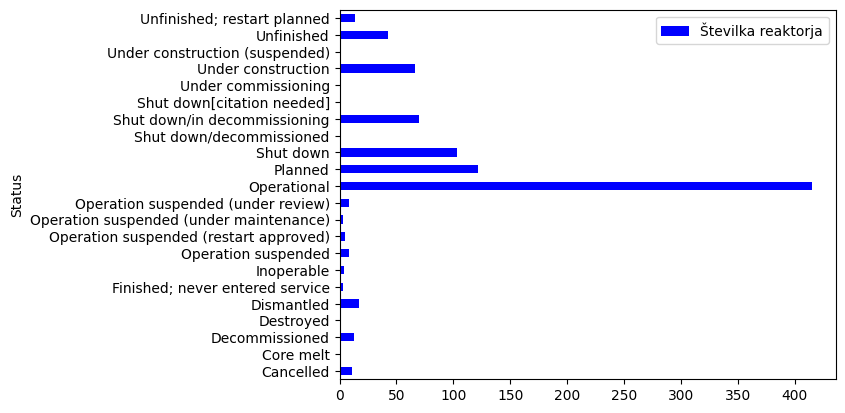

In [7]:
po_statusu = reaktorji.groupby("Status").count()

po_statusu.plot(kind="barh",
                    y="Številka reaktorja",
                    color="blue")

plt.show()


Analiziramo še različne tipe jedrskih reaktorjev. S tabelo najprej prikažemo število reaktorjev posameznega tipa in opazimo, da je najpogostejši tip reaktorja PWR ali pressurized water reactor (tlačnovodni reaktor).

In [8]:
# število reaktorjev posameznega tipa
presteto_tipi = reaktorji["Tip"].value_counts().to_frame()
presteto_tipi.rename(columns={'count':'Število reaktorjev'}, inplace=True)

presteto_tipi

,Število reaktorjev
Tip,
PWR,574
BWR,141
PHWR,76
GCR,51
LWGR,29
FBR,12
SFR,9
HTGR,8
HWGCR,4


In [9]:
po_tipu = reaktorji.groupby("Tip").size()

# najpogostejši tip reaktorja
po_tipu.idxmax()

'PWR'

Takšne pa imamo tudi pri nas v Sloveniji.

In [10]:
# jedrski reaktorji v Sloveniji
reaktorji[reaktorji["Država"] == "Slovenia"]

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
578,Krško,Slovenia,1,PWR,WH 2 loops,Operational,688,30 Mar 1975,1 Jan 1983,(2043)
579,Krško,Slovenia,2,PWR,TBD,Planned,1100,NaN,(2030),NaN


Za boljšo preglednost naredimo tabelo, ki prikazuje posamezne elektrarne z reaktorji in njihovimi močmi v MW. Tako si lahko podrobneje ogledamo reaktorje z večjimi močmi.

In [11]:
# ime elektrarne, njeni reaktorji in njihova moč
reaktorji[["Ime elektrarne", "Številka reaktorja", "Moč (MW)"]]

,Ime elektrarne,Številka reaktorja,Moč (MW)
0,Atucha,1,335
1,Atucha,2,692
2,Atucha,3,1200
3,Embalse,1,600
4,CAREM,1,25
...,...,...,...
907,Yankee Rowe,1,167
908,Zion,1,1040
909,Zion,2,1040
910,Plant in the Jizzakh Region,1,1200


Prikaz vseh reaktorjev z močjo večjo od 1000 MW in njihovo število:

In [12]:
delujoci = reaktorji[reaktorji["Status"] == "Operational"]
moci_delujoci = delujoci[delujoci["Moč (MW)"].astype(float) >= 1000]

# prikaz delujočih jedrskih reaktorjev z močjo večjo od 1000 MW
display(moci_delujoci)

display(len(moci_delujoci))

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
10,Ostrovets,Belarus,1,PWR,VVER-1200/V-491,Operational,1109,6 Nov 2013,10 Jun 2021,NaN
11,Ostrovets,Belarus,2,PWR,VVER-1200/V-491,Operational,1109,24 Apr 2014,1 Nov 2023,NaN
18,Doel,Belgium,4,PWR,Belgian firms plus WH 3 loops,Operational,1039,1 Dec 1978,1 Jul 1985,(2035)
21,Tihange,Belgium,3,PWR,Belgian firms plus WH 3 loops,Operational,1046,1 Nov 1978,1 Sep 1985,(2035)
23,Angra,Brazil,2,PWR,Pre-Konvoi,Operational,1275,1 Jan 1976,1 Feb 2001,NaN
...,...,...,...,...,...,...,...,...,...,...
902,Vogtle,United States,4,PWR,AP1000,Operational,1117,19 Nov 2013,29 April 2024,NaN
903,Waterford,United States,1,PWR,CE 2-loop (DRY),Operational,1168,14 Nov 1974,24 Sep 1985,NaN
904,Watts Bar,United States,1,PWR,WH 4-Loop (ICECOND),Operational,1157,20 Jul 1973,27 May 1996,NaN
905,Watts Bar,United States,2,PWR,WH 4-Loop (ICECOND),Operational,1164,1 Sep 1973,4 Jun 2016,NaN


159

Izmed reaktorjev z močjo nad 1000 MW lahko najdemo 10 tistih, ki imajo največje moči. Vidimo da jih največ najdemo v Franciji, na Kitajskem in Finskem pa so najmočnejši na svetu.

In [17]:
#10 jedrskih reaktorjev z največjo močjo
moci_delujoci.loc["Moč (MW)"] = moci_delujoci["Moč (MW)"].astype(float)

moci_delujoci.nlargest(10, "Moč (MW)")

/tmp/ipykernel_24057/1032281541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moci_delujoci.loc["Moč (MW)"] = moci_delujoci["Moč (MW)"].astype(float)


,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
142,Taishan,China,1,PWR,EPR,Operational,1660.0,18 Nov 2009,14 Dec 2018,NaN
143,Taishan,China,2,PWR,EPR,Operational,1660.0,15 Apr 2010,7 Sep 2019,NaN
201,Olkiluoto,Finland,3,PWR,EPR,Operational,1600.0,12 Aug 2005,16 Apr 2023,NaN
228,Chooz,France,B-1,PWR,N4 REP 1450,Operational,1500.0,1 Jan 1984,15 May 2000,NaN
229,Chooz,France,B-2,PWR,N4 REP 1450,Operational,1500.0,1 Jan 1984,15 May 2000,NaN
230,Civaux,France,1,PWR,N4 REP 1450,Operational,1495.0,15 Oct 1988,29 Jan 2002,NaN
231,Civaux,France,2,PWR,N4 REP 1450,Operational,1495.0,1 Apr 1991,23 Apr 2002,NaN
636,Oskarshamn,Sweden,3,BWR,"ASEA-IV, BWR-3000",Operational,1450.0,1 May 1980,15 Aug 1985,NaN
605,Saeul,South Korea,2,PWR,APR-1400,Operational,1418.0,19 Aug 2009,29 Aug 2019,NaN
604,Saeul,South Korea,1,PWR,APR-1400,Operational,1416.0,16 Oct 2008,15 Jan 2016,NaN


In [ ]:
najmocnejsi = moci_delujoci["Moč (MW)"].astype(float).idxmax()

# jedrski reaktor z največjo močjo
moci_delujoci.loc[najmocnejsi]

Ime elektrarne            Taishan
Država                      China
Številka reaktorja              1
Tip                           PWR
Model                         EPR
Status                Operational
Moč (MW)                     1660
Začetek gradnje       18 Nov 2009
Začetek delovanja     14 Dec 2018
Datum zaprtja                 NaN
Name: 142, dtype: object

#### **Jedrski reaktorji po državah**

Tabelo reaktorjev uredimo po državah in prikažemo število reaktorjev za posamezno državo.

In [33]:
# prikaz reaktorjev razporejenih po državah
reaktorji.groupby("Država").count()

,Ime elektrarne,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
Država,,,,,,,,,
Argentina,5,5,5,5,5,5,4,3,1
Armenia,2,2,2,2,2,2,2,2,2
Austria,1,1,1,1,1,1,1,0,1
Bangladesh,2,2,2,2,2,2,2,2,0
Belarus,4,4,4,4,4,4,4,2,2
Belgium,8,8,8,8,8,8,8,8,8
Brazil,3,3,3,3,3,3,3,3,0
Bulgaria,10,10,10,10,10,10,8,7,4
Canada,29,29,29,29,29,29,29,29,25


In [34]:
po_drzavah = reaktorji.groupby("Država").size()

# država z največ jedrskimi elektrarnami
po_drzavah.idxmax()

'United States'

Iz tabele lahko razberemo, da ima ZDA največ jedrskih elektrarn, takoj za njo pa je Kitajska. Sta edini državi, ki imata več kot 100 jedrskih reaktorjev, velika večina držav pa ima manj kot 50 reaktorjev. Samo en jedrski reaktor pa najdemo v Avstriji, na Filipinih in v Kazahstanu. 

Za boljšo predstavo z grafom prikažemo 20 držav z največjim številom reaktorjev: 

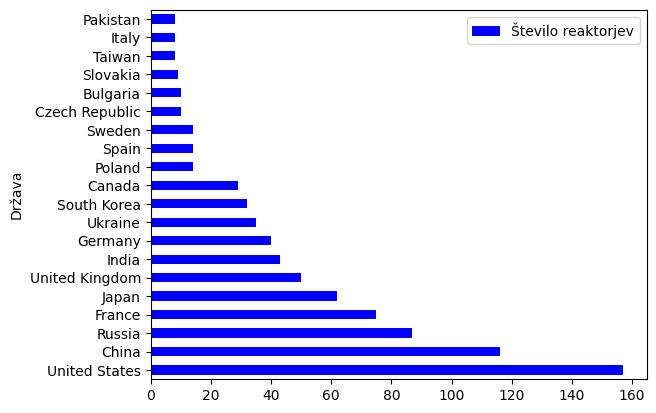

In [22]:
presteto_reaktorji = reaktorji["Država"].value_counts().to_frame()
presteto_reaktorji.rename(columns={"count":"Število reaktorjev"}, inplace=True)
najvec_reaktorjev = presteto_reaktorji.nlargest(20, "Število reaktorjev")

najvec_reaktorjev.plot(kind="barh",
                    y="Število reaktorjev",
                    color="blue")

plt.show()


##### Jedrski reaktorji v ZDA

Podrobneje analiziramo še jedrske elektrarne v ZDA, kot državo z največjim številom jedrskih reaktorjev.

Prikaz tabele reaktorjev v ZDA:

In [24]:
indeksi = reaktorji.index[reaktorji["Država"] == "United States"].tolist()
reaktorji_v_zda = reaktorji.loc[indeksi]

# jedrske elektrarne v ZDA
reaktorji_v_zda

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
753,Arkansas Nuclear One,United States,1,PWR,B & W (DRY-Cont),Operational,836,1 Oct 1968,21 May 1974,NaN
754,Arkansas Nuclear One,United States,2,PWR,CE (DRY),Operational,988,6 Dec 1968,1 Sep 1978,NaN
755,Beaver Valley,United States,1,PWR,WH 3-loop (DRY),Operational,908,26 Jun 1970,2 Jul 1976,NaN
756,Beaver Valley,United States,2,PWR,WH 3-loop (DRY),Operational,905,3 May 1974,14 Aug 1987,NaN
757,Big Rock Point,United States,1,BWR,BWR-1,Dismantled,67,1 May 1960,29 Mar 1963,29 Aug 1997
...,...,...,...,...,...,...,...,...,...,...
905,Watts Bar,United States,2,PWR,WH 4-Loop (ICECOND),Operational,1164,1 Sep 1973,4 Jun 2016,NaN
906,Wolf Creek,United States,1,PWR,WH 4-Loop (DRY),Operational,1200,31 May 1977,3 Sep 1985,NaN
907,Yankee Rowe,United States,1,PWR,WH (DRY),Dismantled,167,1 Nov 1957,1 Jul 1961,1 Oct 1991
908,Zion,United States,1,PWR,WH (DRY),Dismantled,1040,1 Dec 1968,31 Dec 1973,13 Feb 1998


In [32]:
gdf = gpd.read_file("drzave.zip")
gdf.rename(columns={"ADMIN":"Country"}, inplace=True)


           

#gdf.set_index("Country", inplace=True)
#gdf["Število reaktorjev"] = presteto_reaktorji["Število reaktorjev"]
#
#gdf.plot(column="Število reaktorjev", legend=True, missing_kwds={"color":"lightgrey"}, legend_kwds={"orientation":"horizontal"})

Iz tabele lahko razberemo število reaktorjev v državi in od tega, koliko jih je delujočih, planiranih, nedokončanih in zaprtih.

In [ ]:
# število jedrskih reaktorjev v ZDA
len(reaktorji_v_zda)

157

Lahko vidimo, da je velika večina delujočih, približno 10% pa jih je zaprtih.

In [ ]:
# število delujočih reaktorjev
display(len(reaktorji_v_zda.query('Status == "Operational"')))

# število reaktorjev, ki jih še planirajo zgraditi
display(len(reaktorji_v_zda.query('Status == "Planned"')))

# število nedokončahnih reaktorjev
display(len(reaktorji_v_zda.query('Status == "Unfinished"'))) 

# število zaprtih reaktorjev
display(len(reaktorji_v_zda.query('Status == "Shut down"')))

94

9

7

18

Ogledamo si še reaktorje z močjo večjo od 1000 MW: 

In [25]:
delujoci_zda = reaktorji_v_zda[reaktorji_v_zda["Status"] == "Operational"]
moc_delujoci_zda = delujoci_zda[delujoci_zda["Moč (MW)"].astype(int) >= 1000]

# tabela delujočih jedrskih reaktorjev v ZDA z močjo večjo od 1000 MW
moc_delujoci_zda

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
758,Braidwood,United States,1,PWR,WH 4-loop (DRY),Operational,1194,1 Aug 1975,29 Jul 1988,NaN
759,Braidwood,United States,2,PWR,WH 4-loop (DRY),Operational,1160,1 Aug 1975,17 Oct 1988,NaN
760,Browns Ferry,United States,1,BWR,BWR-4 (WET),Operational,1200,1 May 1967,1 Aug 1974,NaN
761,Browns Ferry,United States,2,BWR,BWR-4 (WET),Operational,1200,1 May 1967,1 Mar 1975,NaN
762,Browns Ferry,United States,3,BWR,BWR-4 (WET),Operational,1210,1 Jul 1968,1 Mar 1977,NaN
765,Byron,United States,1,PWR,WH 4-loop (DRY),Operational,1164,1 Apr 1975,16 Sep 1985,NaN
766,Byron,United States,2,PWR,WH 4-loop (DRY),Operational,1136,1 Apr 1975,2 Aug 1987,NaN
767,Callaway,United States,1,PWR,WH 4-loop (DRY),Operational,1215,1 Sep 1975,19 Dec 1984,NaN
776,Catawba,United States,1,PWR,WH 4-loop (ICECOND),Operational,1160,1 May 1974,29 Jun 1985,NaN
777,Catawba,United States,2,PWR,WH 4-loop (ICECOND),Operational,1150,1 May 1974,19 Aug 1986,NaN


In [ ]:
# število delujočih jedrskih reaktorjev v ZDA z močjo večjo od 1000 MW
len(moc_delujoci_zda)

52

Prikaz 10 najmočnejših reaktorjev v ZDA:

In [29]:
moc_delujoci_zda["Moč (MW)"] = moc_delujoci_zda["Moč (MW)"].astype(float)

display(moc_delujoci_zda.nlargest(10, "Moč (MW)"))

/tmp/ipykernel_24057/294694877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moc_delujoci_zda["Moč (MW)"] = moc_delujoci_zda["Moč (MW)"].astype(float)


,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
804,Grand Gulf,United States,1,BWR,BWR-6 (WET),Operational,1401.0,4 May 1974,1 Jul 1985,NaN
850,Peach Bottom,United States,3,BWR,BWR-4 (WET),Operational,1331.0,31 Jan 1968,23 Dec 1974,NaN
844,Palo Verde,United States,2,PWR,CE80 2-loop (DRY),Operational,1314.0,1 Jun 1976,19 Sep 1986,NaN
845,Palo Verde,United States,3,PWR,CE80 2-loop (DRY),Operational,1312.0,1 Jun 1976,8 Jan 1988,NaN
843,Palo Verde,United States,1,PWR,CE80 2-loop (DRY),Operational,1311.0,25 May 1976,28 Jan 1986,NaN
849,Peach Bottom,United States,2,BWR,BWR-4 (WET),Operational,1300.0,31 Jan 1968,5 Jul 1974,NaN
879,South Texas,United States,1,PWR,WH 4-loop (DRY),Operational,1280.0,22 Dec 1975,25 Aug 1988,NaN
880,South Texas,United States,2,PWR,WH 4-loop (DRY),Operational,1280.0,22 Dec 1975,19 Jun 1989,NaN
835,Nine Mile Point,United States,2,BWR,BWR-5 (WET),Operational,1277.0,1 Aug 1975,11 Mar 1988,NaN
885,Susquehanna,United States,1,BWR,BWR-5 (WET),Operational,1257.0,2 Nov 1973,12 Nov 1982,NaN


In [26]:
najmocnejsi = moc_delujoci_zda["Moč (MW)"].astype(float).idxmax()

# jedrski reaktor v ZDA z največjo močjo
moc_delujoci_zda.loc[najmocnejsi]

Ime elektrarne           Grand Gulf
Država                United States
Številka reaktorja                1
Tip                             BWR
Model                   BWR-6 (WET)
Status                  Operational
Moč (MW)                       1401
Začetek gradnje          4 May 1974
Začetek delovanja        1 Jul 1985
Datum zaprtja                   NaN
Name: 804, dtype: object

Vidimo lahko, da ima priblino polovica delujočih jedrskih reaktorjev v ZDA moč večjo od 1000MW. Izmed teh je ima najmočnejši moč 1401 MW, kar je ševedno manj od najmočnejših na svetu, ki jih najdemo na Kitajskem in Finskem z močjo večjo od 1600 MW.

## **Analiza podatkov o jedrskih nesrečah**

#### **Celotna tabela**

Prikaz celotne tabele za boljšo preglednost.

In [ ]:
pd.set_option('display.max_rows', 100)

# prikaz podatkov o jedrskih nesrečah
jedr_nesrece

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
0,2002,"Tihange, Belgium",Belgium,"""Safety injection during hot shutdown at Tihan...",0.0,NaN,2.0
1,2005,"Tihange, Belgium",Belgium,"""Inadequate protection relays and related setp...",0.0,NaN,2.0
2,2006,"Fleurus, Belgium",Belgium,"""Severe health effects for a worker at a comme...",0.0,NaN,4.0
3,2008,"Fleurus, Belgium",Belgium,Iodine-131 release in the environment.,0.0,NaN,3.0
4,2011,"Doel, Belgium",Belgium,"""Inadequate setting of the auxiliary feedwater...",0.0,NaN,2.0
...,...,...,...,...,...,...,...
128,August 2011,"Louisa county, Virginia, USA",United States,A 5.8-earthquake in the region caused the loss...,0.0,NaN,2.0
129,"March 13, 2013","Russellville, Arkansas, USA",United States,Temporary overhead crane collapsed at Arkansas...,1.0,NaN,NaN
130,January 2014,"St. Lucie, Florida, USA",United States,Flooding of the auxiliary building of the St. ...,0.0,NaN,NaN
131,July 2016,"Michigan, USA",United States,Massive steam leak in the turbine building of ...,0.0,NaN,NaN


In [ ]:
# število jedrskih nesrec
len(jedr_nesrece)

133

In [ ]:
jedr_nesrece[["Država", "Smrti", "Škoda (mio $)", "INES ocena"]]

,Država,Smrti,Škoda (mio $),INES ocena
0,Belgium,0.0,NaN,2.0
1,Belgium,0.0,NaN,2.0
2,Belgium,0.0,NaN,4.0
3,Belgium,0.0,NaN,3.0
4,Belgium,0.0,NaN,2.0
...,...,...,...,...
128,United States,0.0,NaN,2.0
129,United States,1.0,NaN,NaN
130,United States,0.0,NaN,NaN
131,United States,0.0,NaN,NaN


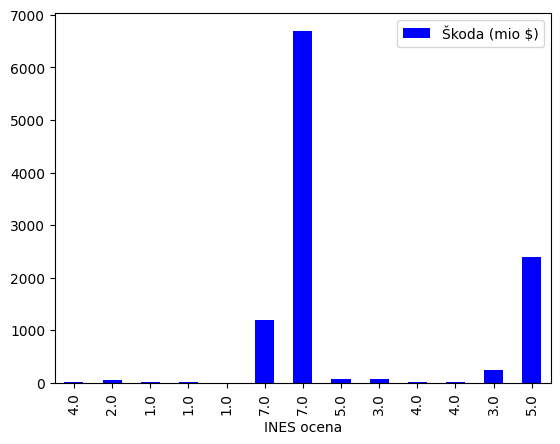

In [ ]:
jedr_nesrece.dropna().plot(kind="bar",
                    x="INES ocena",
                    y="Škoda (mio $)",
                    color="blue")

plt.show()

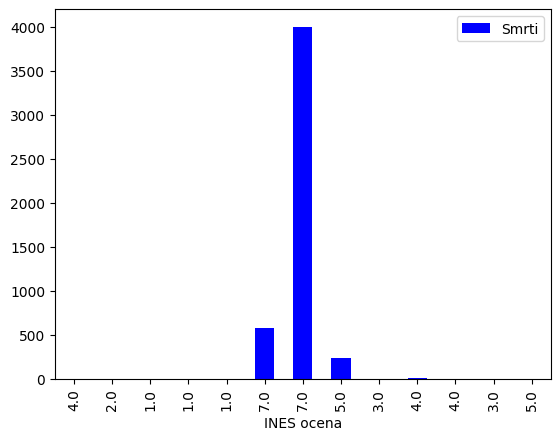

In [ ]:
jedr_nesrece.dropna().plot(kind="bar",
                    x="INES ocena",
                    y="Smrti",
                    color="blue")

plt.show()


In [ ]:
jedr_nesrece["INES ocena"] = jedr_nesrece["INES ocena"].dropna(how='all')
po_lestvici = jedr_nesrece[jedr_nesrece["INES ocena"].astype(float) >= 4]

# prikaz jedrskih nesreč z oceno 4 ali več na INES lestvici 
po_lestvici

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
2,2006,"Fleurus, Belgium",Belgium,"""Severe health effects for a worker at a comme...",0.0,NaN,4.0
5,"December 12, 1952","CRL, Ontario, Canada",Canada,The NRX accident. A hydrogen explosion occurre...,0.0,NaN,5.0
15,17 Oct 1969,"Loir-et-Cher, France",France,50 kg of uranium dioxide melted inside of the ...,0.0,NaN,4.0
17,13 Mar 1980,"Loir-et-Cher, France",France,A malfunctioning cooling system fused fuel ele...,0.0,22.0,4.0
48,30 Sept 1999,"Tokaimura, Japan",Japan,The criticality accident at the Tokai fuel fab...,2.0,NaN,4.0
54,Mar 2011,"Fukushima Dai-ichi, Japan",Japan,The world's second INES 7 accident. A magnitud...,573.0,1200.0,7.0
57,1957,"Mayak reprocessing plant, Ural-region",Russia,Kyshtym disaster: Explosion in a waste tank of...,200.0,NaN,6.0
58,1975,"Leningrad, Soviet union",Russia,Reactor 1 of the Leningrad Nuclear Power Plant...,0.0,NaN,4.0
66,January 1969,"Lucens, Switzerland",Switzerland,Melting of a fuel element of the protoptype po...,0.0,NaN,4.0
69,26 Apr 1986,"Pripyat, Ukraine, USSR",Ukraine,Steam explosion and meltdown (see Chernobyl di...,4000.0,6700.0,7.0


In [ ]:
jedr_nesrece["Škoda (mio $)"] = jedr_nesrece["Škoda (mio $)"].dropna(how='all')
po_skodi = jedr_nesrece[jedr_nesrece["Škoda (mio $)"].astype(float) >= 400]

# prikaz jedrskih nesreč, ki so povzročile največ stroškov 
po_skodi

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
54,Mar 2011,"Fukushima Dai-ichi, Japan",Japan,The world's second INES 7 accident. A magnitud...,573.0,1200.0,7.0
69,26 Apr 1986,"Pripyat, Ukraine, USSR",Ukraine,Steam explosion and meltdown (see Chernobyl di...,4000.0,6700.0,7.0
88,"March 28, 1979","Middletown, Pennsylvania, USA",United States,"Loss of coolant and partial core meltdown, see...",0.0,2400.0,5.0
97,"March 9, 1985","Athens, Alabama, USA",United States,Instrumentation systems malfunction during sta...,0.0,1830.0,NaN
98,"April 11, 1986","Plymouth, Massachusetts, USA",United States,Recurring equipment problems force emergency s...,0.0,1001.0,NaN
100,"March 31, 1987","Delta, Pennsylvania, USA",United States,Peach Bottom units 2 and 3 shutdown due to coo...,0.0,400.0,NaN
127,"February 1, 2010","Vernon, Vermont, USA",United States,Deteriorating underground pipes from the Vermo...,0.0,700.0,NaN


In [ ]:
jedr_nesrece["Smrti"] = jedr_nesrece["Smrti"].dropna(how='all')
po_smrti = jedr_nesrece[jedr_nesrece["Smrti"].astype(float) >= 200]

#prkaz jedrskih nesreč, ki so povzročile največ smrti
po_smrti

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
54,Mar 2011,"Fukushima Dai-ichi, Japan",Japan,The world's second INES 7 accident. A magnitud...,573.0,1200.0,7.0
57,1957,"Mayak reprocessing plant, Ural-region",Russia,Kyshtym disaster: Explosion in a waste tank of...,200.0,NaN,6.0
69,26 Apr 1986,"Pripyat, Ukraine, USSR",Ukraine,Steam explosion and meltdown (see Chernobyl di...,4000.0,6700.0,7.0
72,8 Oct 1957,"Sellafield, UK",United Kingdom,Fire ignited plutonium piles of a military rea...,240.0,78.0,5.0


In [ ]:
najhujsa = jedr_nesrece["Smrti"].astype(float).idxmax()

#jedrska nesreča, ki je povzročila največ stroškov in smrti ter ima najvišjo oceno po INES lestvici
jedr_nesrece.loc[najhujsa]

Datum                                                  26 Apr 1986
Lokacija                                    Pripyat, Ukraine, USSR
Država                                                     Ukraine
Opis             Steam explosion and meltdown (see Chernobyl di...
Smrti                                                       4000.0
Škoda (mio $)                                               6700.0
INES ocena                                                     7.0
Name: 69, dtype: object

#### **Jedrske nesreče po državah**

In [ ]:
# prikaz jedrskih nesreč razporejenih po državah
jedr_nesrece.groupby("Država").count()

,Datum,Lokacija,Opis,Smrti,Škoda (mio $),INES ocena
Država,,,,,,
Belgium,5,5,5,5,0,5
Canada,10,10,10,10,0,3
France,12,12,12,12,9,8
Germany,3,3,3,3,2,1
India,6,6,6,6,6,0
Japan,20,20,20,20,1,5
Pakistan,1,1,1,1,0,0
Russia,7,7,7,5,0,3
Serbia,1,1,1,1,0,1


In [ ]:
nesrece_po_drzavah = jedr_nesrece.groupby("Država").size()

# država z največ jedrskimi nesrečami
nesrece_po_drzavah.idxmax()

'United States'

##### Jedrske nesreče v ZDA

In [ ]:
indeksi = jedr_nesrece.index[jedr_nesrece["Država"] == "United States"].tolist()
nesrece_v_zda = jedr_nesrece.loc[indeksi]

# jedrske elektrarne v ZDA
nesrece_v_zda

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
79,"November 29, 1955","Idaho Falls, Idaho, USA",United States,Power excursion with partial core meltdown at ...,0.0,5.0,NaN
80,"July 26, 1959","Simi Valley, California, USA",United States,Partial core meltdown at Santa Susana Field La...,0.0,32.0,NaN
81,"January 3, 1961","Idaho Falls, Idaho, USA",United States,Explosion at National Reactor Testing Station'...,3.0,22.0,4.0
82,"October 5, 1966","Monroe, Michigan, USA",United States,Sodium cooling system malfunctions at Enrico F...,0.0,19.0,4.0
83,"August 11, 1973","Palisades, Michigan, USA",United States,Steam generator leak causes manual shutdown of...,0.0,10.0,NaN
84,"March 22, 1975","Browns Ferry, Alabama, USA",United States,Fire burns for seven hours and damages more th...,0.0,240.0,3.0
85,"November 5, 1975","Brownsville, Nebraska, USA",United States,Hydrogen gas explosion damages the Cooper Nucl...,0.0,13.0,NaN
86,"June 10, 1977","Waterford, Connecticut, USA",United States,Hydrogen gas explosion damages three buildings...,0.0,15.0,NaN
87,"February 4, 1979","Surry, Virginia, USA",United States,Surry Unit 2 shut down in response to failing ...,0.0,12.0,NaN
88,"March 28, 1979","Middletown, Pennsylvania, USA",United States,"Loss of coolant and partial core meltdown, see...",0.0,2400.0,5.0


In [ ]:
#število jedrskih nesreč v ZDA
len(nesrece_v_zda)

54

In [ ]:
max_smrti = nesrece_v_zda["Smrti"].astype(float).idxmax()
max_skoda = nesrece_v_zda["Škoda (mio $)"].astype(float).idxmax()
max_ocena = nesrece_v_zda["INES ocena"].astype(float).idxmax()

#jedrska nesreča v ZDA z največjim številom smrti
display(nesrece_v_zda.loc[max_smrti])

#jedrska nesreča v ZDA, ki je povzročila največjo denarno škodo
display(nesrece_v_zda.loc[max_skoda])

#jedrska nesreča v ZDA z največjo INES oceno
display(nesrece_v_zda.loc[max_ocena])

Datum                                                         1986
Lokacija                                      Surry, Virginia, USA
Država                                               United States
Opis             Broken Feedwater pipe at Surry Nuclear Power P...
Smrti                                                          4.0
Škoda (mio $)                                                  NaN
INES ocena                                                     NaN
Name: 99, dtype: object

Datum                                               March 28, 1979
Lokacija                             Middletown, Pennsylvania, USA
Država                                               United States
Opis             Loss of coolant and partial core meltdown, see...
Smrti                                                          0.0
Škoda (mio $)                                               2400.0
INES ocena                                                     5.0
Name: 88, dtype: object

Datum                                               March 28, 1979
Lokacija                             Middletown, Pennsylvania, USA
Država                                               United States
Opis             Loss of coolant and partial core meltdown, see...
Smrti                                                          0.0
Škoda (mio $)                                               2400.0
INES ocena                                                     5.0
Name: 88, dtype: object

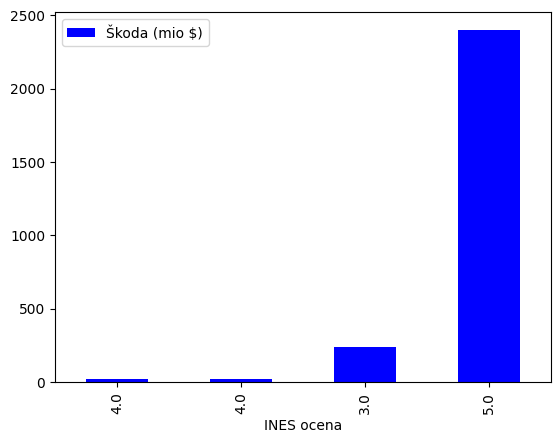

In [ ]:
nesrece_v_zda.dropna().plot(kind='bar',
                    x='INES ocena',
                    y='Škoda (mio $)',
                    color='blue')

plt.show()

## **Primerjava podatkov o jedrskih reaktorjih in nesrečah**

In [ ]:
# ustvarimo tabelo s podatki o številu reaktorjev in nesreč na državo

presteto_nesrece = jedr_nesrece["Država"].value_counts().to_frame()
presteto_reaktorji = reaktorji["Država"].value_counts().to_frame()

st_nesrec = presteto_nesrece["count"]
presteto_reaktorji.rename(columns={'count':'Število reaktorjev'}, inplace=True)
presteto_reaktorji.insert(1, column="Število nesreč", value=st_nesrec)

display(presteto_reaktorji)

,Število reaktorjev,Število nesreč
Država,,
United States,157,54.0
China,116,NaN
Russia,87,7.0
France,75,12.0
Japan,62,20.0
United Kingdom,50,8.0
India,43,6.0
Germany,40,3.0
Ukraine,35,2.0


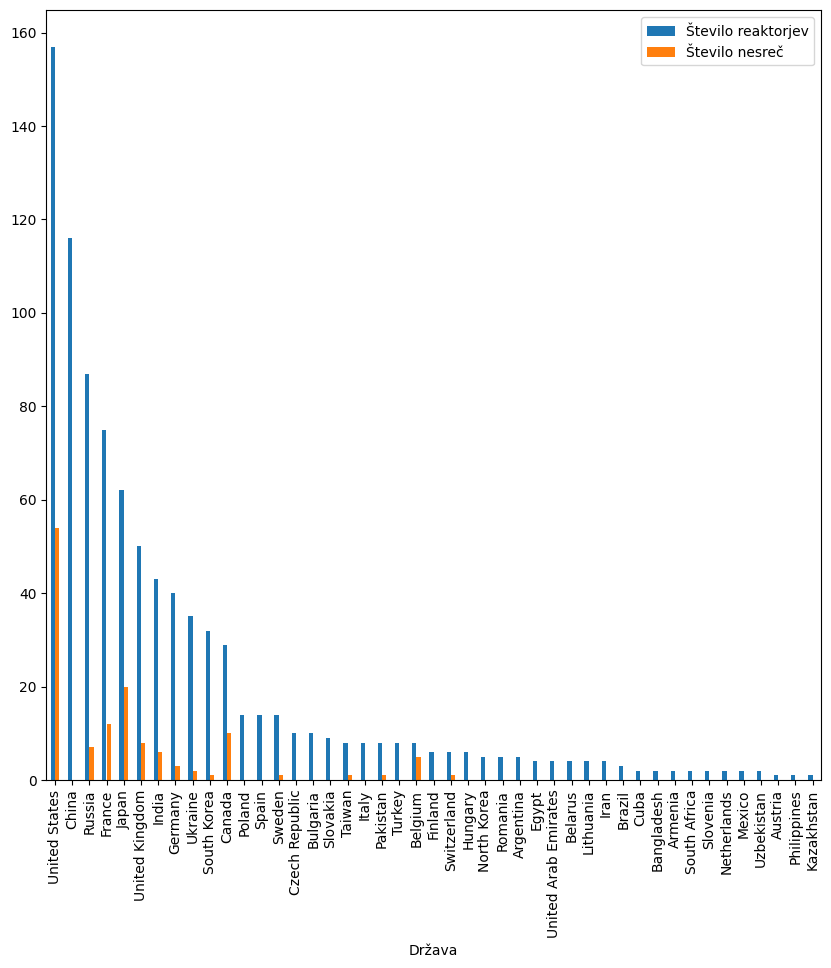

In [ ]:
presteto_reaktorji.plot(y=["Število reaktorjev", "Število nesreč"],
                        kind="bar", figsize=(10, 10))

plt.show()

<Axes: >

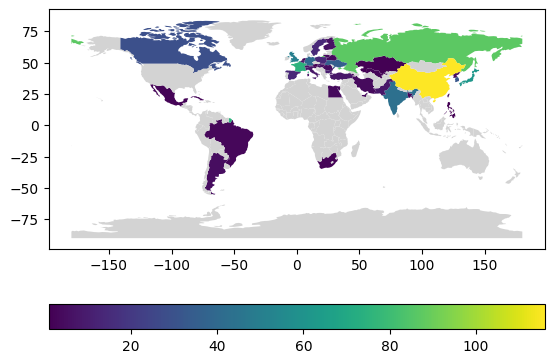

In [ ]:
gdf = gpd.read_file("drzave.zip")
gdf.rename(columns={"ADMIN":"Country"}, inplace=True)


gdf.set_index("Country", inplace=True)
gdf["Število reaktorjev"] = presteto_reaktorji["Število reaktorjev"]

gdf.plot(column="Število reaktorjev", legend=True, missing_kwds={"color":"lightgrey"}, legend_kwds={"orientation":"horizontal"})


<Axes: >

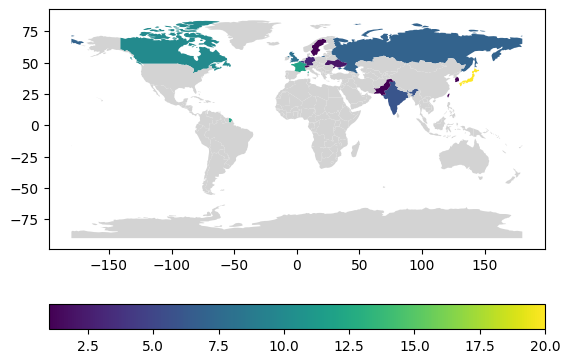

In [ ]:
gdf = gpd.read_file("drzave.zip")
gdf.rename(columns={"ADMIN":"Country"}, inplace=True)
gdf.set_index("Country", inplace=True)
gdf["Število nesreč"] = presteto_reaktorji["Število nesreč"]

gdf.plot(column="Število nesreč", legend=True, missing_kwds={"color":"lightgrey"}, legend_kwds={"orientation":"horizontal"})